In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

empty_file_path = r"C:\Users\phamt\Documents\ML\Combined_empty1new.txt"
occupied_file_path = r"C:\Users\phamt\Documents\ML\Combined_occupied1new.txt"

def load_data(file_path, label):
    X = []
    y = []
    with open(file_path, "r") as f:
        for line in f:
            values = line.strip().split(",")
            try:
                data = [float(value) for value in values]
                X.append(data)
                if label == "occupied":
                    y.append(1)  # Assign label 1 for 'occupied'
                elif label == "empty":
                    y.append(0)  # Assign label 0 for 'empty'
                else:
                    raise ValueError("Invalid label specified.")
            except ValueError:
                print(f"Error converting values to float in file '{file_path}': {values}")
                continue
    return X, y

X_occupied, y_occupied = load_data(occupied_file_path, label="occupied")  # Label 1 for 'occupied'
X_empty, y_empty = load_data(empty_file_path, label="empty")  # Label 0 for 'empty'

X_occupied, y_occupied = load_data(occupied_file_path, label="occupied")  # Label 1 for 'occupied'
X_empty, y_empty = load_data(empty_file_path, label="empty")  # Label 0 for 'empty'

X = np.concatenate((X_occupied, X_empty), axis=0)
y = np.concatenate((y_occupied, y_empty), axis=0)

# Normalize the data
X = X / np.max(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Train the model
model.fit(np.expand_dims(X_train, axis=-1), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(np.expand_dims(X_test, axis=-1), y_test)
print("Test accuracy:", test_acc)



Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_occupied1new.txt': ['\x1a']
Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_empty1new.txt': ['\x1a']
Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_occupied1new.txt': ['\x1a']
Error converting values to float in file 'C:\Users\phamt\Documents\ML\Combined_empty1new.txt': ['\x1a']



Epoch 1/10


800/800 [==============================] - 98s 120ms/step - loss: 0.1751 - accuracy: 0.9323 - val_loss: 0.0715 - val_accuracy: 0.9752
Epoch 2/10
800/800 [==============================] - 97s 121ms/step - loss: 0.0679 - accuracy: 0.9786 - val_loss: 0.0540 - val_accuracy: 0.9847
Epoch 3/10
800/800 [==============================] - 97s 121ms/step - loss: 0.0538 - accuracy: 0.9828 - val_loss: 0.0464 - val_accuracy: 0.9844
Epoch 4/10
800/800 [==============================] - 95s 118ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0375 - val_accuracy:

In [ ]:
model.save("my_model_1new.keras")

In [ ]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_model_1new.keras")

# Evaluate the loaded model
loaded_model.evaluate(np.expand_dims(X_test, axis=-1), y_test)


250/250 [==============================] - 8s 30ms/step - loss: 0.0229 - accuracy: 0.9915


[0.022931549698114395, 0.9915000200271606]

Ignoring line 20001: Unable to convert to floats: ['\x1a']
Ignoring line 20001: Unable to convert to floats: ['\x1a']
1250/1250 [==============================] - 29s 23ms/step
Predictions: [[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
Confusion Matrix:
[[19933    67]
 [ 2042 17958]]
Confusion Matrix (Percentage):
[[49.8325  0.1675]
 [ 5.105  44.895 ]]


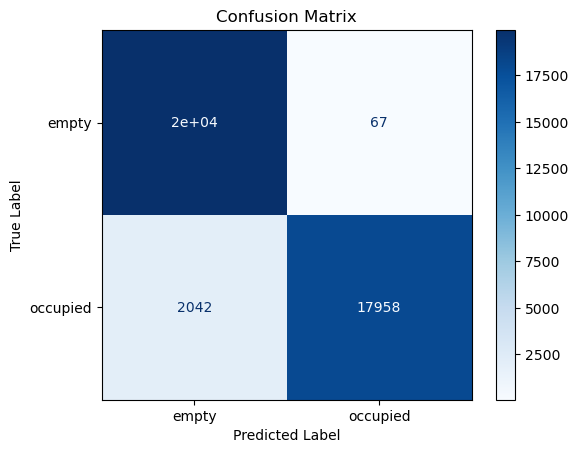

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

# Step 1: Read Data from Text Files
empty_file_path = r"C:\Users\phamt\Documents\ML\Combined_empty3n.txt"
occupied_file_path = r"C:\Users\phamt\Documents\ML\Combined_occupied3n.txt"

# Load data function
def load_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = []
        rows = 0
        for line in lines:
            if line.strip():  # Check if the line is not empty
                rows += 1
                values = line.strip().split(",")  # Assuming data is comma-separated
                try:
                    # Convert strings to floats (if necessary)
                    data.append([float(value) for value in values])
                except ValueError:
                    print(f"Ignoring line {rows}: Unable to convert to floats:", values)
        return data

# Load data from files
occupied_data = load_data(occupied_file_path)
empty_data = load_data(empty_file_path)


# Combine the data from both files
combined_data = np.concatenate(( occupied_data,empty_data), axis=0)

# Step 4: Load Pre-Trained Model
model_file = "my_model_1new.keras"  # Path to the saved pre-trained model
loaded_model = tf.keras.models.load_model(model_file)  # Load the model using Keras

# Step 5: Make Predictions
new_predictions = loaded_model.predict(combined_data)
print("Predictions:", new_predictions)

# Create true labels based on the number of empty and occupied samples
true_labels =   ['occupied'] * len(occupied_data) + ['empty'] * len(empty_data)

# Convert predictions to labels
predicted_labels = ['empty' if pred == 0 else 'occupied' for pred in new_predictions]

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate confusion matrix in percentage
total_samples = np.sum(conf_matrix)
cm_percent = (conf_matrix / total_samples) * 100
print("Confusion Matrix (Percentage):")
print(cm_percent)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['empty', 'occupied'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
